# This Script contains the followings:
### 1.Importing the libraries and datasets
### 2. Data cleaning and checking
### 3. Visualizations

# 1.Importing the libraries and datasets

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [123]:
path = r'/Users/fatemehshahvirdi/Work-Related/Data Analysis/Data Immersion/Achievement 6/Rome & Sydney Analysis/O2 Data'

In [124]:
df_rome_june = pd.read_csv(os.path.join(path, 'Prepared', 'rome_listings_june_cleaned.csv'), index_col=False)

# 2. Data cleaning and checking

In [125]:
df_rome_june.head()

,Unnamed: 0,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,0,2737,3047,Place to stay in Rome,★4.80,1 bedroom,1 bed,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,1,181189,868477,Bed and breakfast in Rome,★4.72,1 bedroom,1 bed,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,2,11834,44552,Rental unit in Rome,★4.80,1 bedroom,1 bed,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,3,49240,224479,Condo in Rome,★4.69,2 bedrooms,5 beds,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,4,181747,871063,Rental unit in Rome,★4.56,2 bedrooms,3 beds,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


In [126]:
df_rome_june.columns

Index(['Unnamed: 0', 'id', 'host_id', 'place_name', 'rating', 'num_bedroom',
       'num_bed', 'baths', 'neighborhood', 'latitude', 'longitude',
       'room_type', 'price', 'min_nights', 'num_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'num_reviews_last_12m'],
      dtype='object')

In [127]:
# Remove the unwanted column
df_rome_june = df_rome_june.loc[:, ~df_rome_june.columns.str.contains('Unnamed: 0')]

In [128]:
df_rome_june.head()

,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,2737,3047,Place to stay in Rome,★4.80,1 bedroom,1 bed,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,181189,868477,Bed and breakfast in Rome,★4.72,1 bedroom,1 bed,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,11834,44552,Rental unit in Rome,★4.80,1 bedroom,1 bed,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,49240,224479,Condo in Rome,★4.69,2 bedrooms,5 beds,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,181747,871063,Rental unit in Rome,★4.56,2 bedrooms,3 beds,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


In [129]:
df_rome_june.dtypes

id                                  int64
host_id                             int64
place_name                         object
rating                             object
num_bedroom                        object
num_bed                            object
baths                              object
neighborhood                       object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
min_nights                          int64
num_reviews                         int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
num_reviews_last_12m                int64
dtype: object

In [130]:
# I want to see the distribution of bedroom and I need to change the data type of it to float
# Remove the star symbol
df_rome_june['rating'] = df_rome_june['rating'].str.replace('★', '')

# Convert the 'rating' column to float, coercing errors to NaN
df_rome_june['rating'] = pd.to_numeric(df_rome_june['rating'], errors='coerce')

In [131]:
# Extract the numeric part and convert to float
df_rome_june['num_bedroom'] = df_rome_june['num_bedroom'].str.extract('(\d+)').astype(float)

In [132]:
df_rome_june.head()

,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,2737,3047,Place to stay in Rome,4.80,1.0,1 bed,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,181189,868477,Bed and breakfast in Rome,4.72,1.0,1 bed,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,11834,44552,Rental unit in Rome,4.80,1.0,1 bed,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,49240,224479,Condo in Rome,4.69,2.0,5 beds,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,181747,871063,Rental unit in Rome,4.56,2.0,3 beds,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


In [133]:
# Extract the numeric part and convert to float
df_rome_june['num_bed'] = df_rome_june['num_bed'].str.extract('(\d+)').astype(float)

In [134]:
df_rome_june.head()

,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,2737,3047,Place to stay in Rome,4.80,1.0,1.0,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,181189,868477,Bed and breakfast in Rome,4.72,1.0,1.0,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,11834,44552,Rental unit in Rome,4.80,1.0,1.0,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,49240,224479,Condo in Rome,4.69,2.0,5.0,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,181747,871063,Rental unit in Rome,4.56,2.0,3.0,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


# 3. Visualizations

In [135]:
df_rome_june[['id', 'host_id', 'rating', 'num_bedroom','num_bed', 'longitude', 'price', 'min_nights', 'num_reviews',
              'reviews_per_month', 'calculated_host_listings_count','availability_365', 'num_reviews_last_12m']].corr()

,id,host_id,rating,num_bedroom,num_bed,longitude,price,min_nights,num_reviews,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
id,1.000000,0.420499,0.025737,-0.057964,-0.055809,-0.007491,0.035061,-0.061977,-0.320141,0.327366,0.026380,0.209945,-0.158266
host_id,0.420499,1.000000,0.016567,-0.040495,-0.035650,-0.009923,0.027393,-0.092248,-0.257069,0.166248,-0.141504,0.103840,-0.072524
rating,0.025737,0.016567,1.000000,0.013579,-0.008402,-0.022881,0.028597,0.044164,0.087659,0.158912,-0.206110,-0.086440,0.129528
num_bedroom,-0.057964,-0.040495,0.013579,1.000000,0.693053,-0.040079,0.394368,0.019715,-0.020286,-0.080208,0.040780,-0.007779,-0.028526
num_bed,-0.055809,-0.035650,-0.008402,0.693053,1.000000,-0.064152,0.336855,0.003304,-0.014332,-0.076688,0.016542,0.025019,-0.025780
longitude,-0.007491,-0.009923,-0.022881,-0.040079,-0.064152,1.000000,-0.013285,0.009242,0.024179,0.039051,0.004732,-0.020128,0.015724
price,0.035061,0.027393,0.028597,0.394368,0.336855,-0.013285,1.000000,-0.053254,-0.065556,-0.047414,0.149130,0.122240,-0.062702
min_nights,-0.061977,-0.092248,0.044164,0.019715,0.003304,0.009242,-0.053254,1.000000,-0.032794,-0.108552,-0.077185,-0.051469,-0.089625
num_reviews,-0.320141,-0.257069,0.087659,-0.020286,-0.014332,0.024179,-0.065556,-0.032794,1.000000,0.450929,-0.044328,-0.025702,0.693812
reviews_per_month,0.327366,0.166248,0.158912,-0.080208,-0.076688,0.039051,-0.047414,-0.108552,0.450929,1.000000,-0.059504,0.087697,0.689210


In [136]:
df_sub = pd.DataFrame(df_rome_june,columns=['rating', 'num_bedroom', 'num_bed','price','min_nights',
'num_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'num_reviews_last_12m'])

In [137]:
df_rome_june.head()

,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,2737,3047,Place to stay in Rome,4.80,1.0,1.0,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,181189,868477,Bed and breakfast in Rome,4.72,1.0,1.0,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,11834,44552,Rental unit in Rome,4.80,1.0,1.0,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,49240,224479,Condo in Rome,4.69,2.0,5.0,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,181747,871063,Rental unit in Rome,4.56,2.0,3.0,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


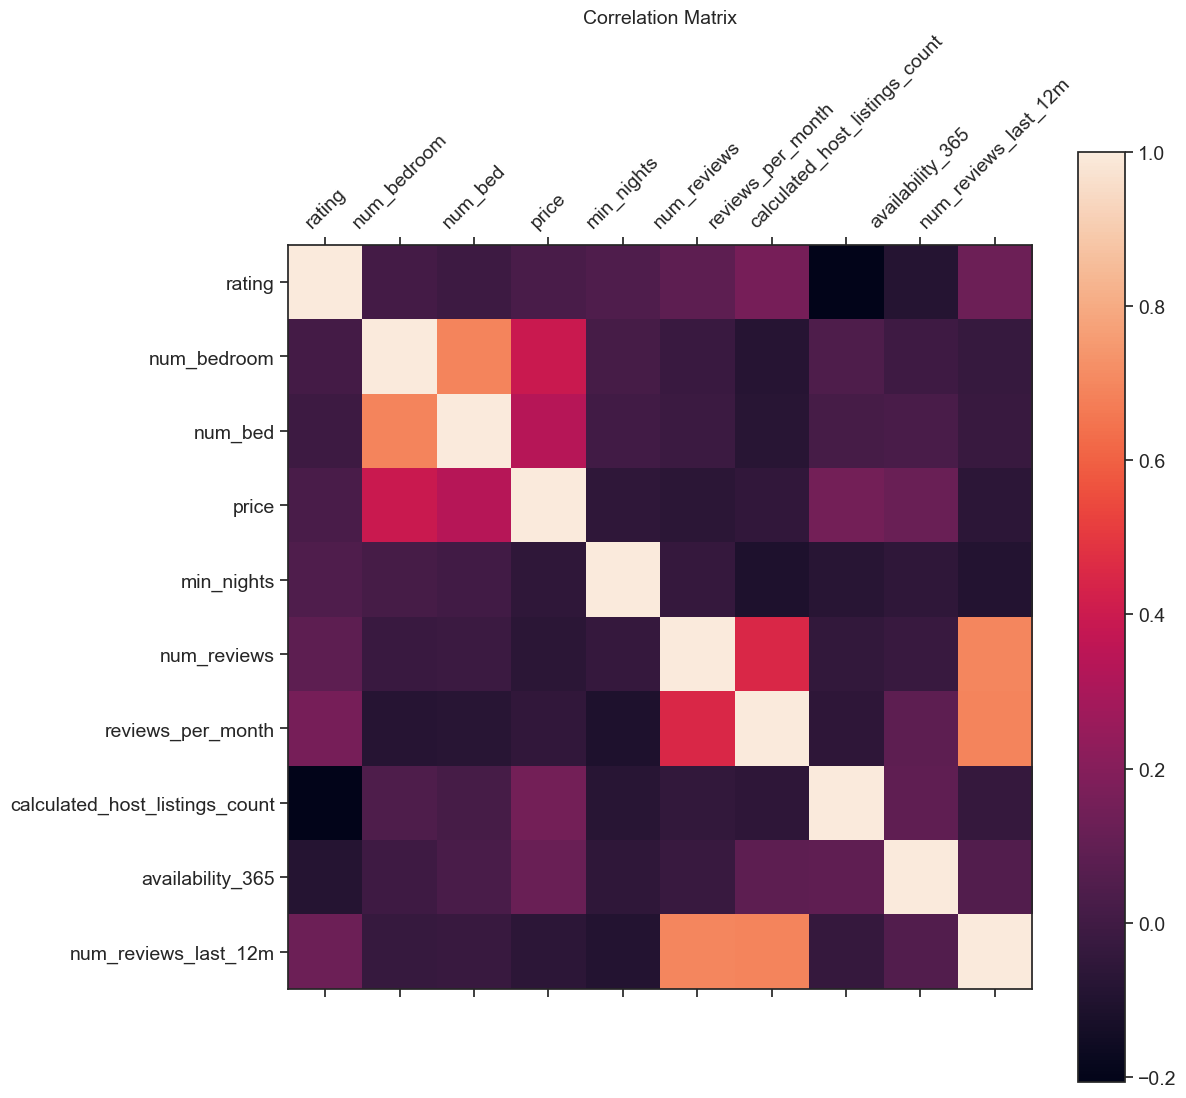

In [140]:
f = plt.figure(figsize=(12, 12)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig('Correlation Matrix.png', dpi=300, bbox_inches='tight')

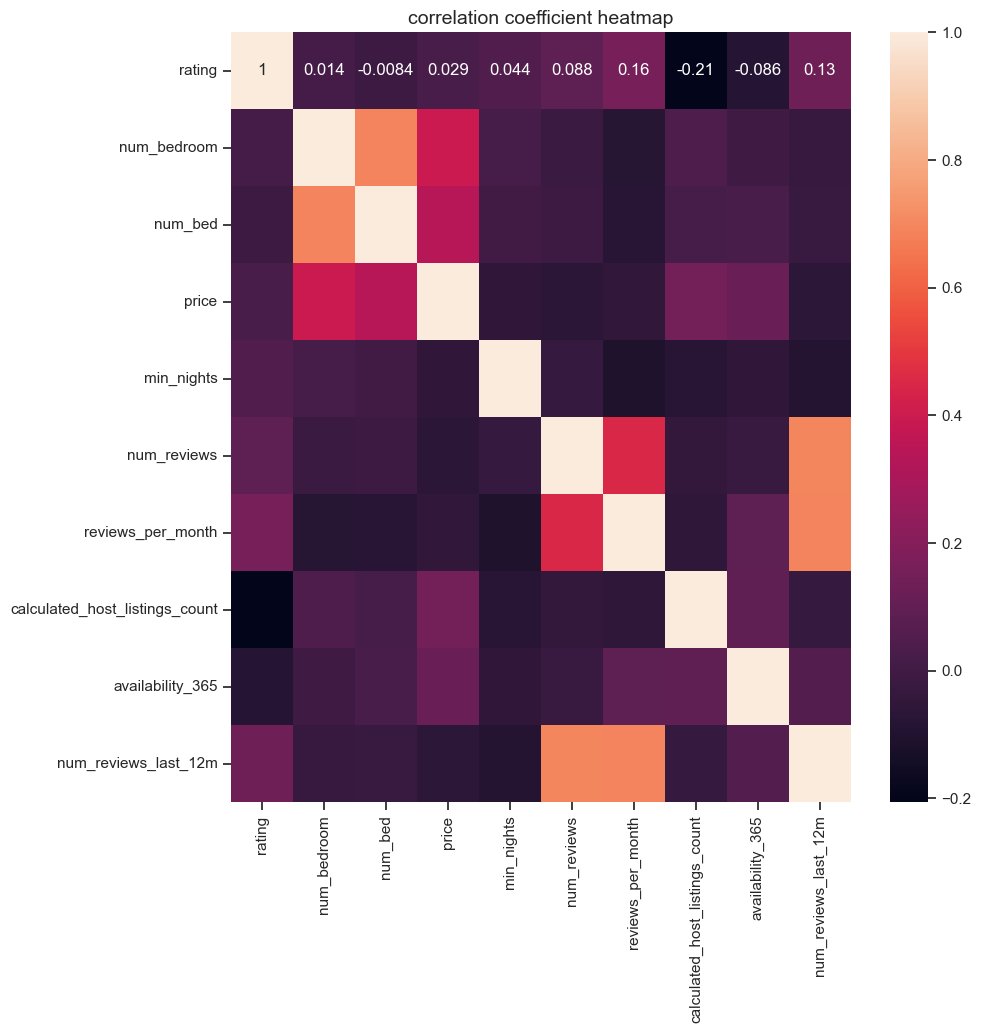

In [143]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.title('correlation coefficient heatmap', fontsize=14) # add title
plt.savefig('correlation coefficient heatmap.png', dpi=300, bbox_inches='tight')

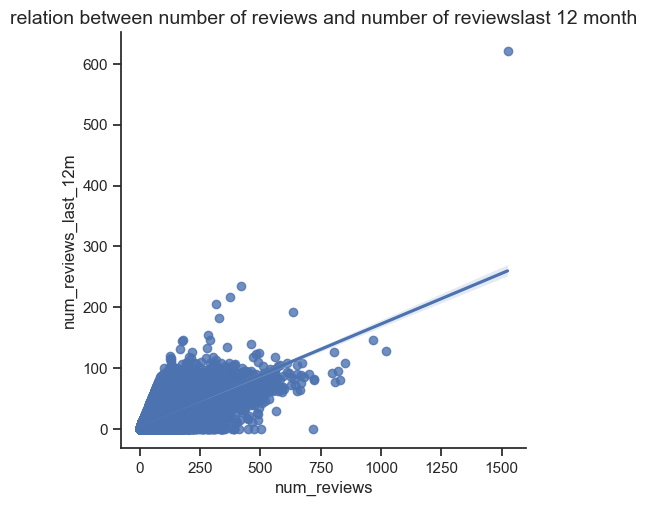

In [147]:
sns.lmplot(x = 'num_reviews', y = 'num_reviews_last_12m', data = df_rome_june)
plt.title('relation between number of reviews and number of reviewslast 12 month', fontsize=14) # add title
plt.savefig('relation between number of reviews and number of reviewslast 12 month.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

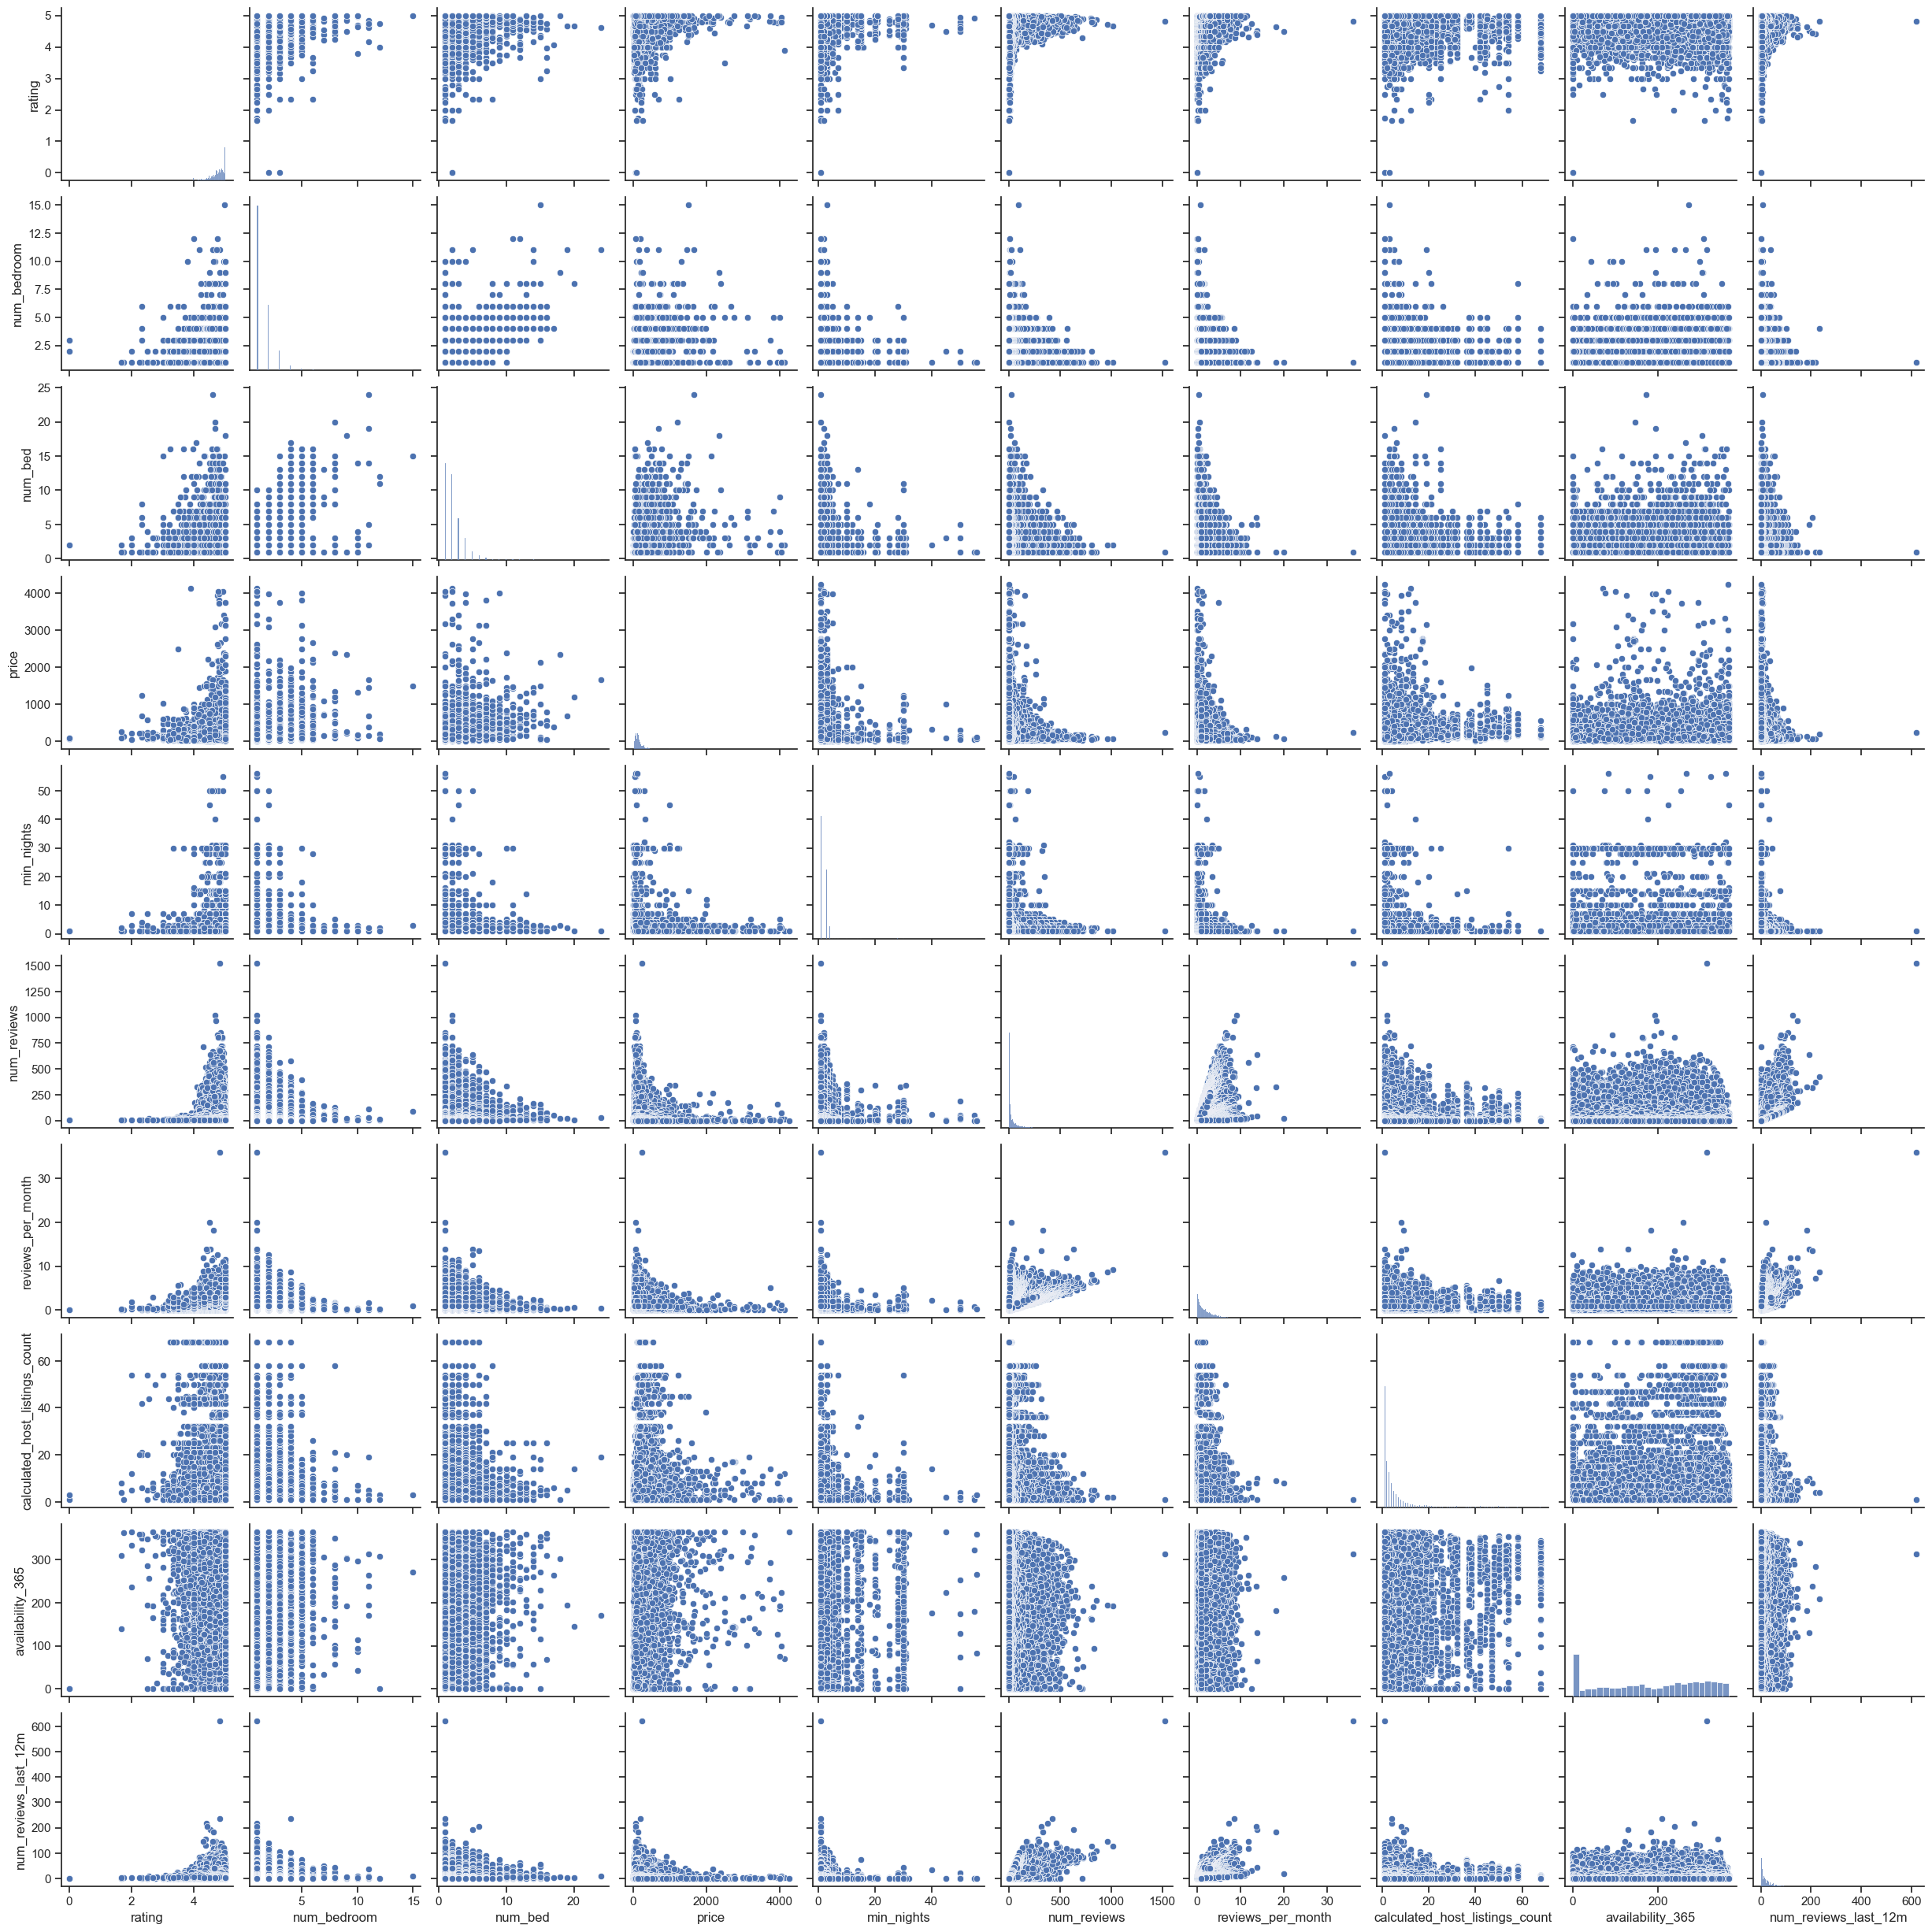

In [148]:
g = sns.pairplot(df_sub)
plt.savefig('general.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


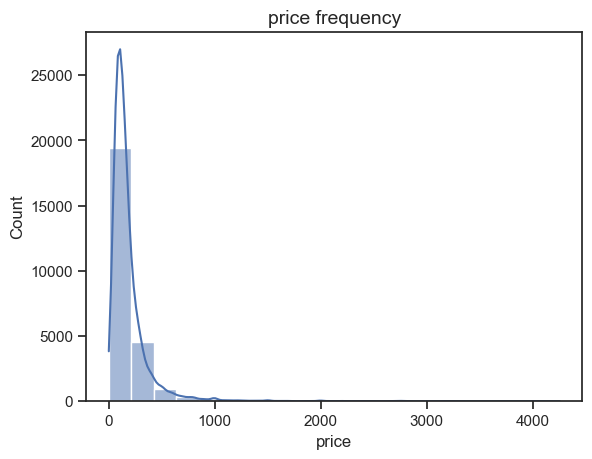

In [158]:
sns.histplot(df_sub['price'], bins = 20, kde = True)
plt.title('price frequency', fontsize=14) # add title
plt.savefig('price frequency', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


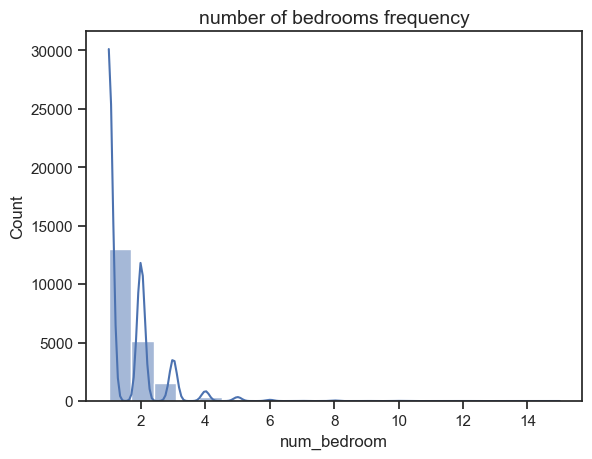

In [159]:
sns.histplot(df_sub['num_bedroom'], bins = 20, kde = True)
plt.title('number of bedrooms frequency', fontsize=14) # add title
plt.savefig('number of bedrooms frequency', dpi=300, bbox_inches='tight')

In [150]:
# Group prices 
price_conditions = [
    (df_sub['price'] < 100),
    (df_sub['price'] >= 100) & (df_sub['price'] < 200),
    (df_sub['price'] >= 200) & (df_sub['price'] < 500),
    (df_sub['price'] >= 500) & (df_sub['price'] < 1000),
    (df_sub['price'] >= 1000)
]


price_groups = ['lowest', 'low', 'medium', 'high', 'very-high']

df_sub['price-ranges'] = np.select(price_conditions, price_groups)

In [151]:
df_sub['price-ranges'].value_counts(dropna=False)

price-ranges
low          10181
lowest        8412
medium        5772
high           982
very-high      294
Name: count, dtype: int64

In [152]:
df_sub.head(1)

,rating,num_bedroom,num_bed,price,min_nights,num_reviews,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m,price-ranges
0,4.8,1.0,1.0,50,7,7,0.07,6,358,0,lowest


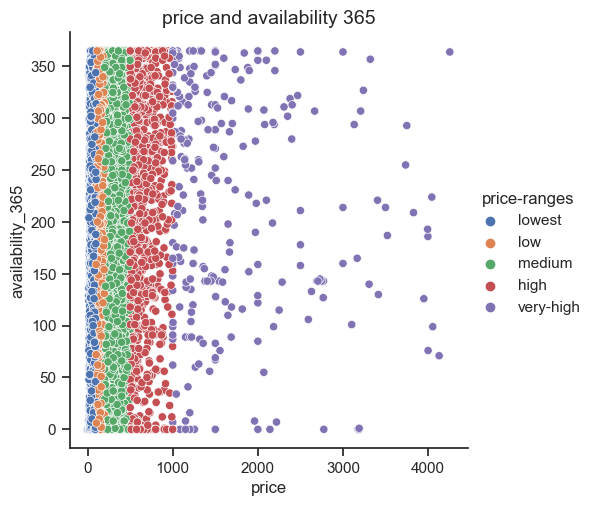

In [153]:
sns.set(style="ticks")
g = sns.relplot(x="price", y="availability_365", hue="price-ranges", data=df_sub)
plt.title('price and availability 365', fontsize=14) # add title
plt.savefig('price and availability 365', dpi=300, bbox_inches='tight')

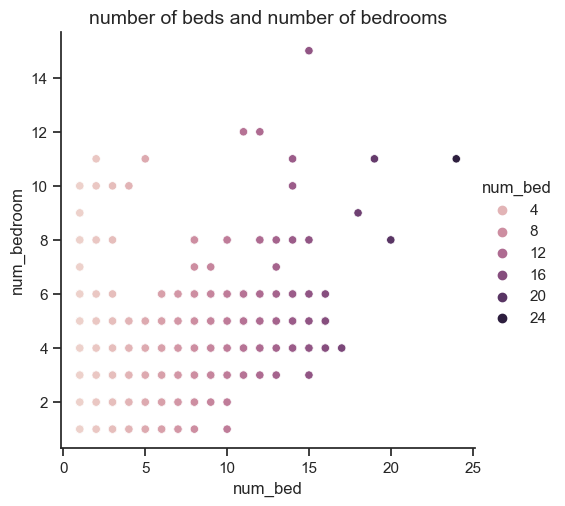

In [154]:
sns.set(style="ticks")
g = sns.relplot(x="num_bed", y="num_bedroom", hue="num_bed", data=df_sub)
plt.title('number of beds and number of bedrooms', fontsize=14) # add title
plt.savefig('number of beds and number of bedrooms', dpi=300, bbox_inches='tight')

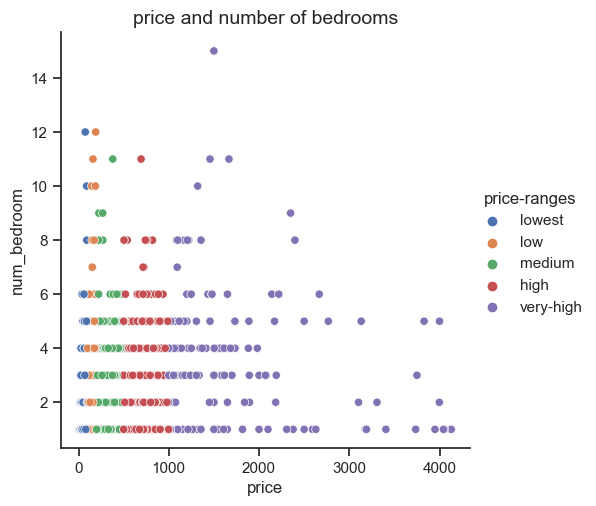

In [155]:
sns.set(style="ticks")
g = sns.relplot(x="price", y="num_bedroom", hue="price-ranges", data=df_sub)
plt.title('price and number of bedrooms', fontsize=14) # add title
plt.savefig('price and number of bedrooms', dpi=300, bbox_inches='tight')

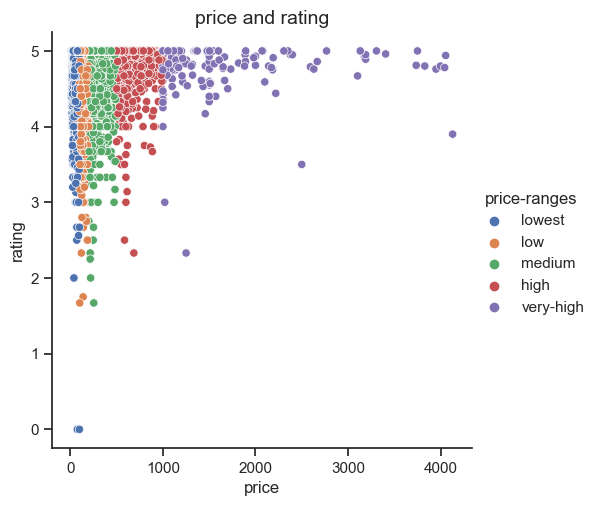

In [156]:
sns.set(style="ticks")
g = sns.relplot(x="price", y="rating", hue="price-ranges", data=df_sub)
plt.title('price and rating', fontsize=14) # add title
plt.savefig('price and rating', dpi=300, bbox_inches='tight')

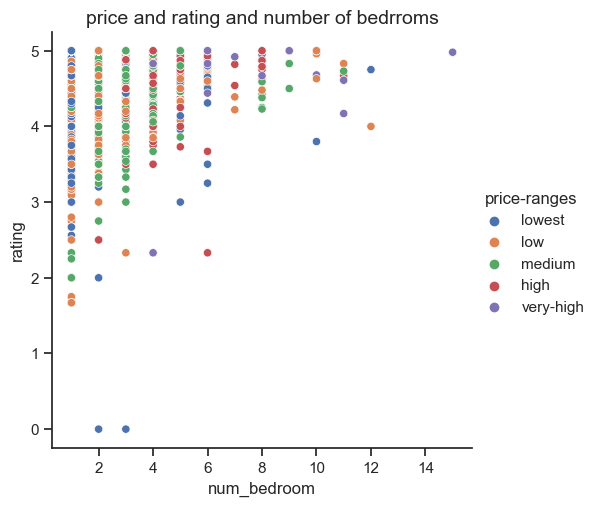

In [157]:
sns.set(style="ticks")
g = sns.relplot(x="num_bedroom", y="rating", hue="price-ranges", data=df_sub)
plt.title('price and rating and number of bedrroms', fontsize=14) # add title
plt.savefig('price and rating and number of bedrroms', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


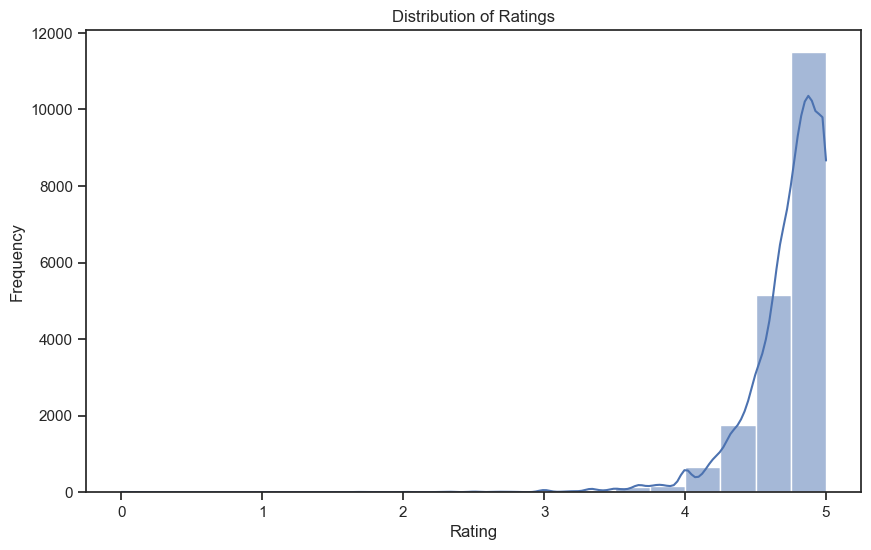

In [160]:
plt.figure(figsize=(10, 6))
sns.histplot(df_rome_june['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('Distribution_of_ratings.png', dpi=300, bbox_inches='tight')

plt.show()

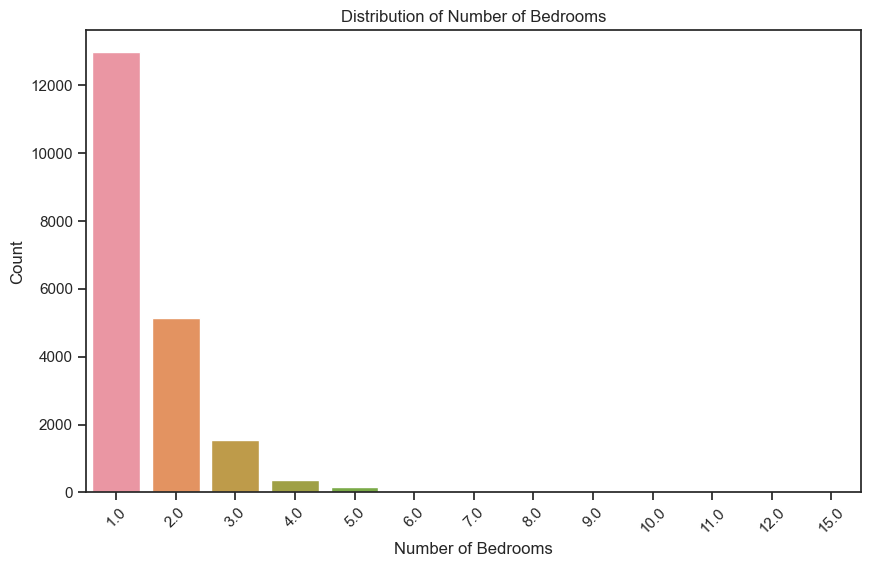

In [161]:
#Visualizie the 'num_bedroom'
# Drop NaN values to ensure we only plot valid numbers
df_rome_june = df_rome_june.dropna(subset=['num_bedroom'])

# Plot the distribution of number of bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(data=df_rome_june, x='num_bedroom')
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig('Distribution_of_number_of_bedrooms.png', dpi=300, bbox_inches='tight')
plt.show()

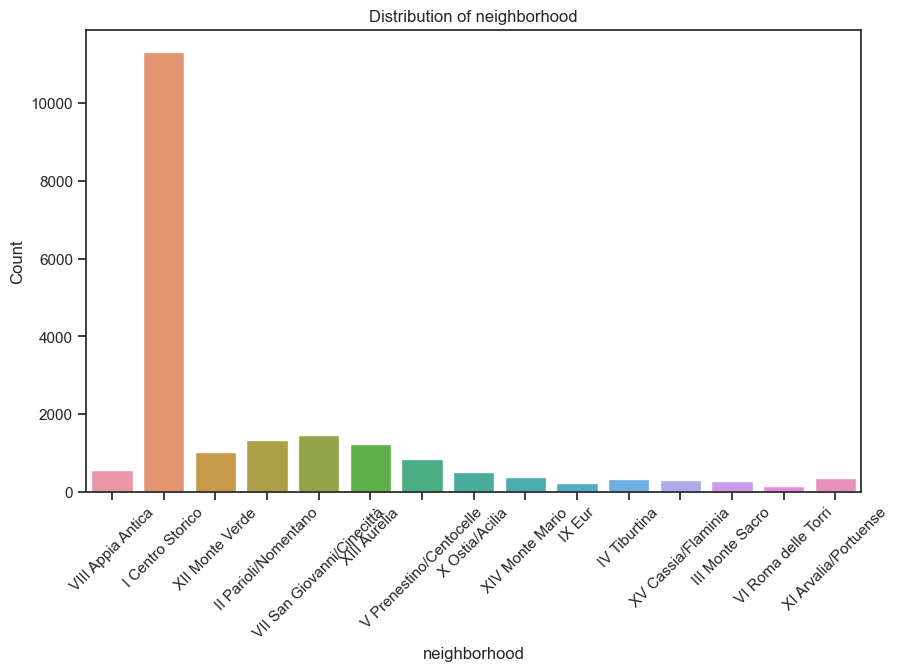

In [162]:
#Visualizie the 'neighborhood'
df_rome_june = df_rome_june.dropna(subset=['neighborhood'])

# Plot the distribution of neighborhood
plt.figure(figsize=(10, 6))
sns.countplot(data=df_rome_june, x='neighborhood')
plt.title('Distribution of neighborhood')
plt.xlabel('neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('Distribution_of_neighbourhood.png', dpi=300, bbox_inches='tight')
plt.show()

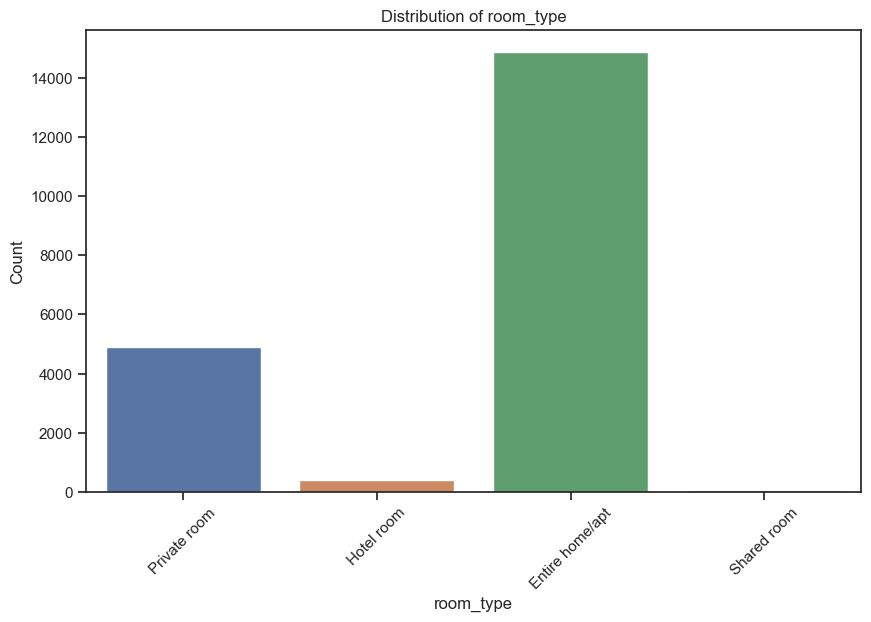

In [163]:
# visualize the room_type
df_rome_june = df_rome_june.dropna(subset=['room_type'])

# Plot the distribution of room_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_rome_june, x='room_type')
plt.title('Distribution of room_type')
plt.xlabel('room_type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('Distribution_of_number_of_room_type.png', dpi=300, bbox_inches='tight')
plt.show()

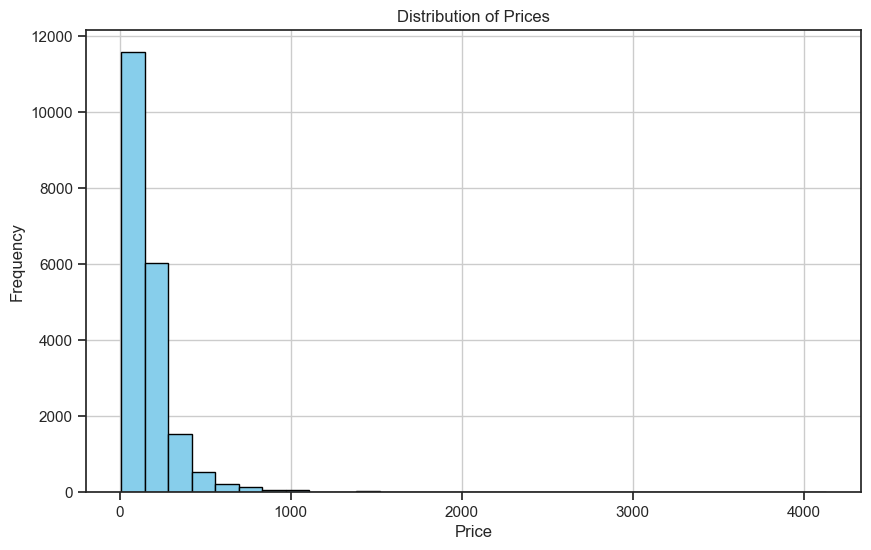

In [164]:
# Plot the distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(df_rome_june['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability

plt.savefig('Distribution_of_prices.png', dpi=300, bbox_inches='tight')
plt.show()

## check correlations

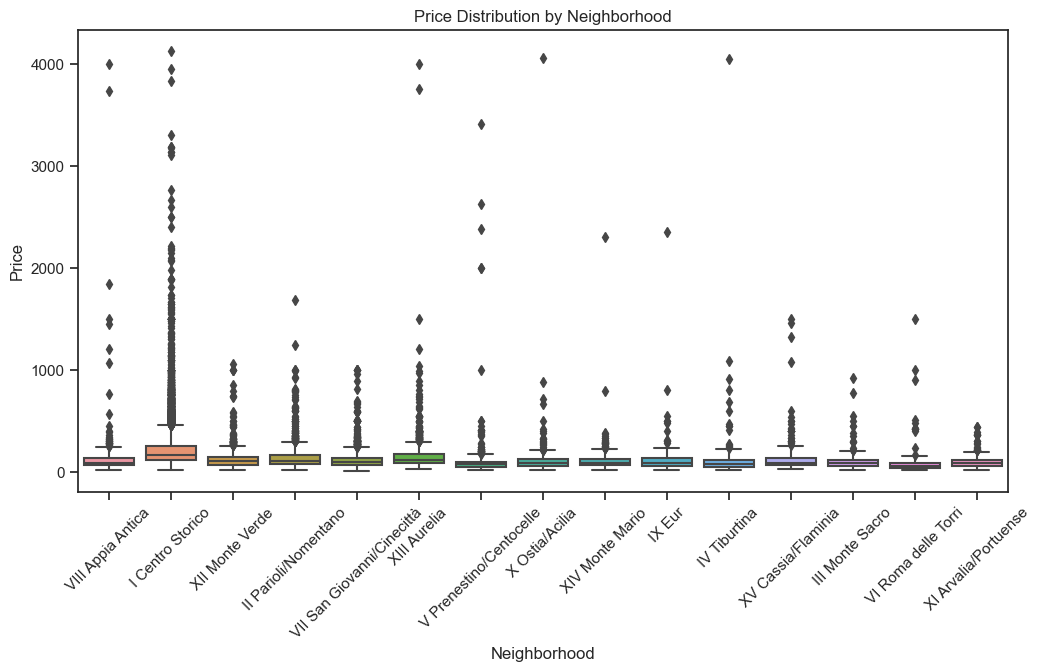

In [165]:
# Create a box plot to visualize the relationship between price and neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rome_june, x='neighborhood', y='price')
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45) 
# Rotate x-axis labels for better readability
plt.savefig('Price Distribution by Neighborhood.png', dpi=300, bbox_inches='tight')
plt.show()

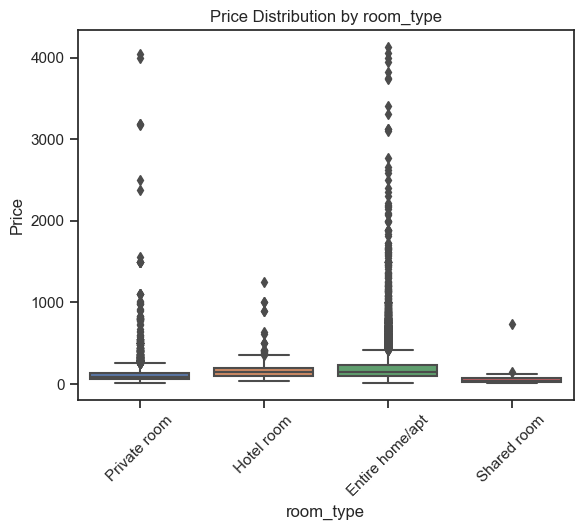

In [167]:
# Create a box plot to visualize the relationship between price and room_type
sns.boxplot(data=df_rome_june, x='room_type', y='price')
plt.title('Price Distribution by room_type')
plt.xlabel('room_type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig('Price Distribution by room_type.png', dpi=300, bbox_inches='tight')
plt.show()

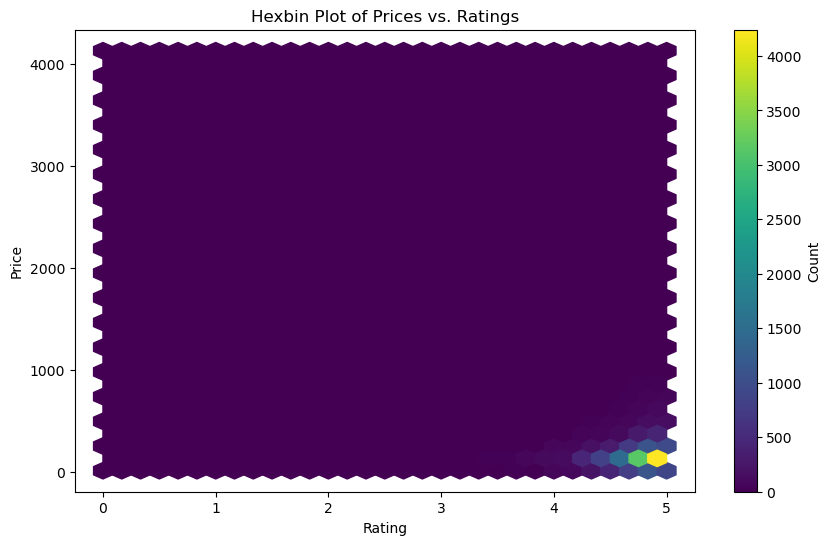

In [36]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_rome_june['rating'], df_rome_june['price'], gridsize=30, cmap='viridis')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Prices vs. Ratings')
plt.xlabel('Rating')
plt.ylabel('Price')

plt.savefig('Hexbin Plot of Prices vs. Ratings.png', dpi=300, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


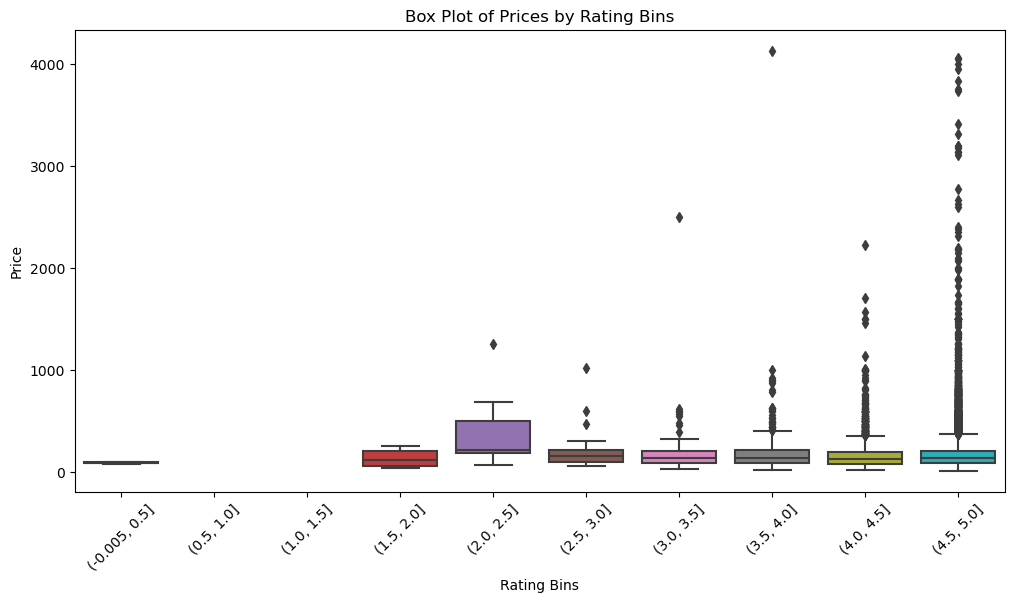

In [37]:
# Create bins for the ratings
df_rome_june['rating_bin'] = pd.cut(df_rome_june['rating'], bins=10)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rome_june, x='rating_bin', y='price')
plt.title('Box Plot of Prices by Rating Bins')
plt.xlabel('Rating Bins')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig('Box Plot of Prices by Rating Bins.png', dpi=300, bbox_inches='tight')
plt.show()

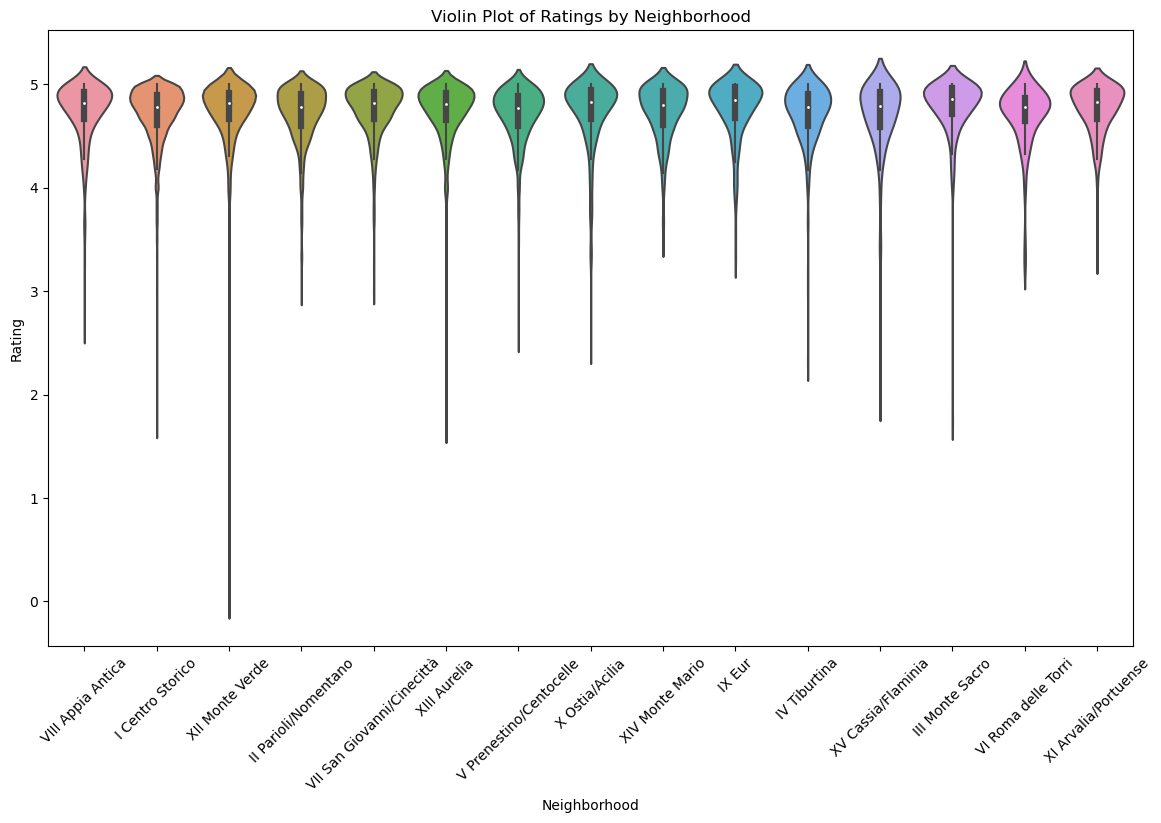

In [38]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_rome_june, x='neighborhood', y='rating')
plt.title('Violin Plot of Ratings by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig('Violin Plot of Ratings by Neighborhood.png', dpi=300, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/l

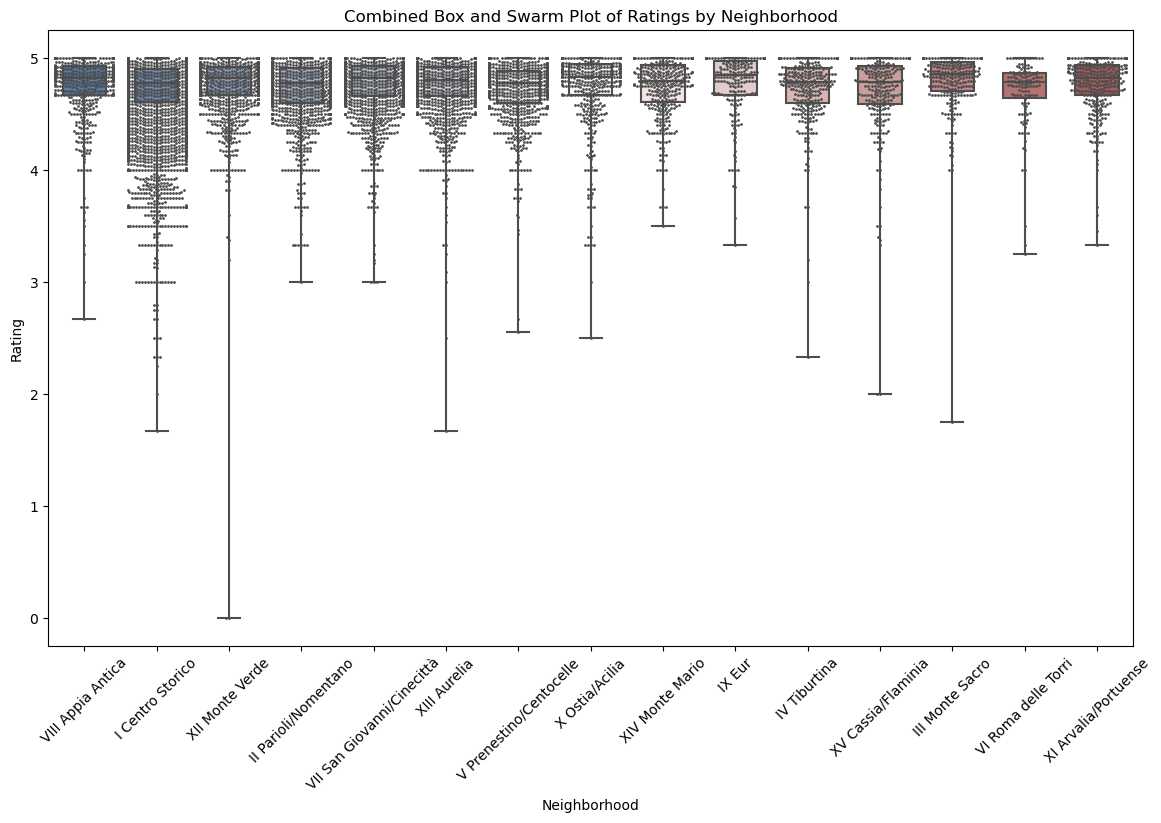

In [39]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_rome_june, x='neighborhood', y='rating', whis=[0, 100], width=0.6, palette="vlag")
sns.swarmplot(data=df_rome_june, x='neighborhood', y='rating', size=2, color=".3", linewidth=0)
plt.title('Combined Box and Swarm Plot of Ratings by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig('Combined Box and Swarm Plot of Ratings by Neighborhood.png', dpi=300, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 97.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/l

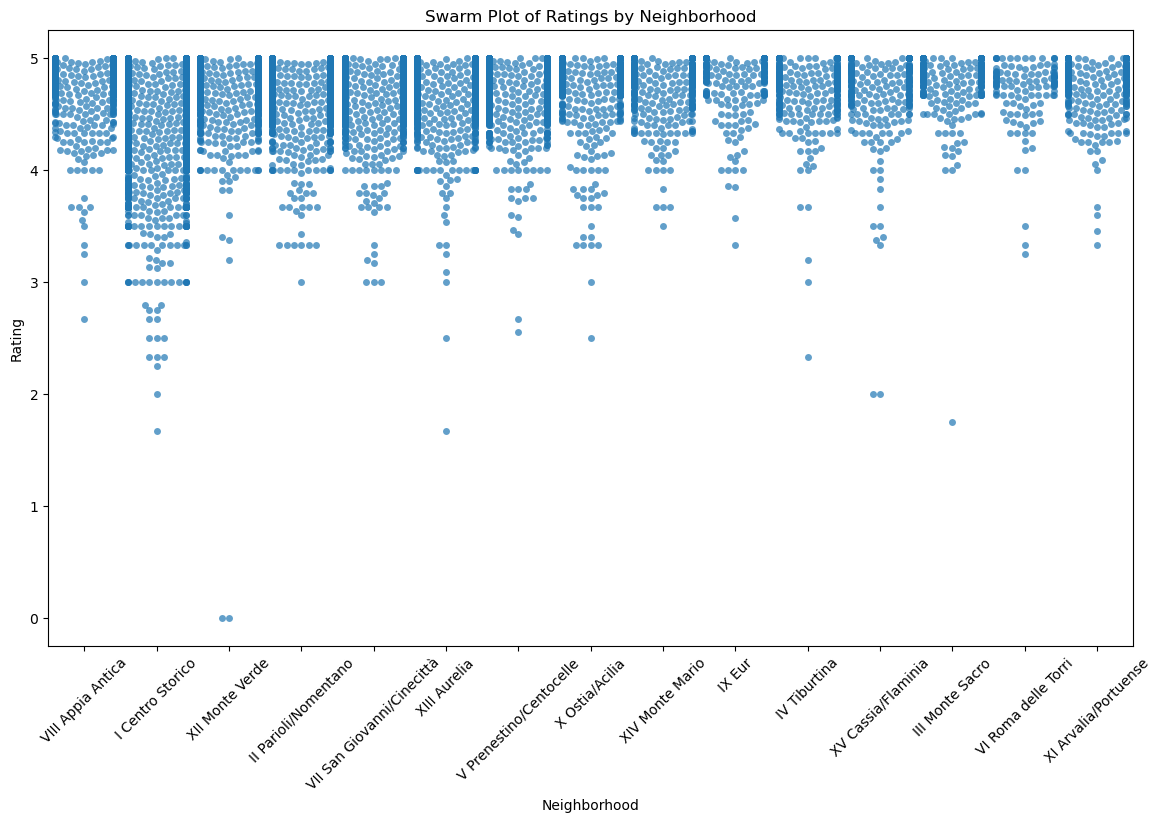

In [40]:
plt.figure(figsize=(14, 8))
sns.swarmplot(data=df_rome_june, x='neighborhood', y='rating', alpha=0.7)
plt.title('Swarm Plot of Ratings by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig('Swarm Plot of Ratings by Neighborhood.png', dpi=300, bbox_inches='tight')
plt.show()

In [168]:
df_rome_june.to_csv(os.path.join(path,'Prepared', 'rome_listings_june_cleaned-2.csv'))